# Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Preprocessing

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df = df.drop_duplicates()

In [10]:
df = df.drop("User ID",axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df.Gender = LE.fit_transform(df.Gender)

In [12]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# Splitting of Dataset

In [13]:
x = df.loc[:,["Gender","Age", "EstimatedSalary"]].values
y = df.loc[:,"Purchased"].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [15]:
x_train

array([[     1,     26,  16000],
       [     0,     47,  47000],
       [     0,     28,  84000],
       [     0,     41,  72000],
       [     1,     31,  66000],
       [     0,     47, 107000],
       [     1,     28, 123000],
       [     0,     22,  55000],
       [     1,     30,  49000],
       [     0,     48,  29000],
       [     1,     27,  89000],
       [     0,     42,  80000],
       [     1,     46, 117000],
       [     1,     48,  41000],
       [     1,     35,  59000],
       [     0,     30, 116000],
       [     0,     35,  47000],
       [     1,     24,  58000],
       [     0,     19,  21000],
       [     0,     52, 114000],
       [     1,     19,  76000],
       [     1,     19,  19000],
       [     0,     26,  52000],
       [     1,     25,  33000],
       [     1,     41,  52000],
       [     1,     33,  43000],
       [     1,     46,  59000],
       [     1,     22,  81000],
       [     1,     42,  54000],
       [     0,     57,  33000],
       [  

# Features Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Fitting Random Forest to the Training set

In [17]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')
Rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

# Predicting the Test set Result

In [18]:
y_pred = Rf.predict(x_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.874509211718514

# Making the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[72,  5],
       [ 8, 35]])

# Visualising the Training Set result

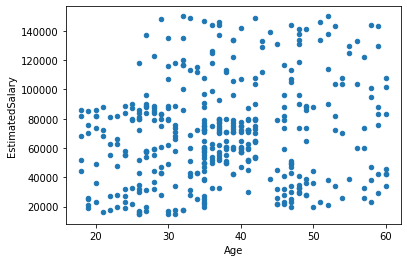

In [22]:
df.plot("Age","EstimatedSalary", kind="scatter")

# Visualising the Test Set result

AUC Score of the model is: 0.874509211718514


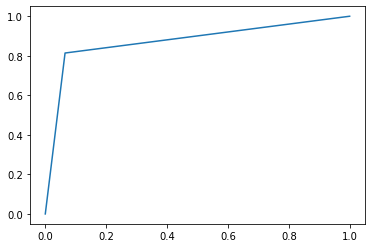

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, t = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
print("AUC Score of the model is:",roc_auc_score(y_test, y_pred))

In [29]:
from sklearn.tree import export_graphviz
R_Tree = Rf.estimators_[25]
export_graphviz(R_Tree, 
                out_file='tree.dot', 
                feature_names = ["Gender","Age","EstimatedSalary"],
                class_names = "Purchassed",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

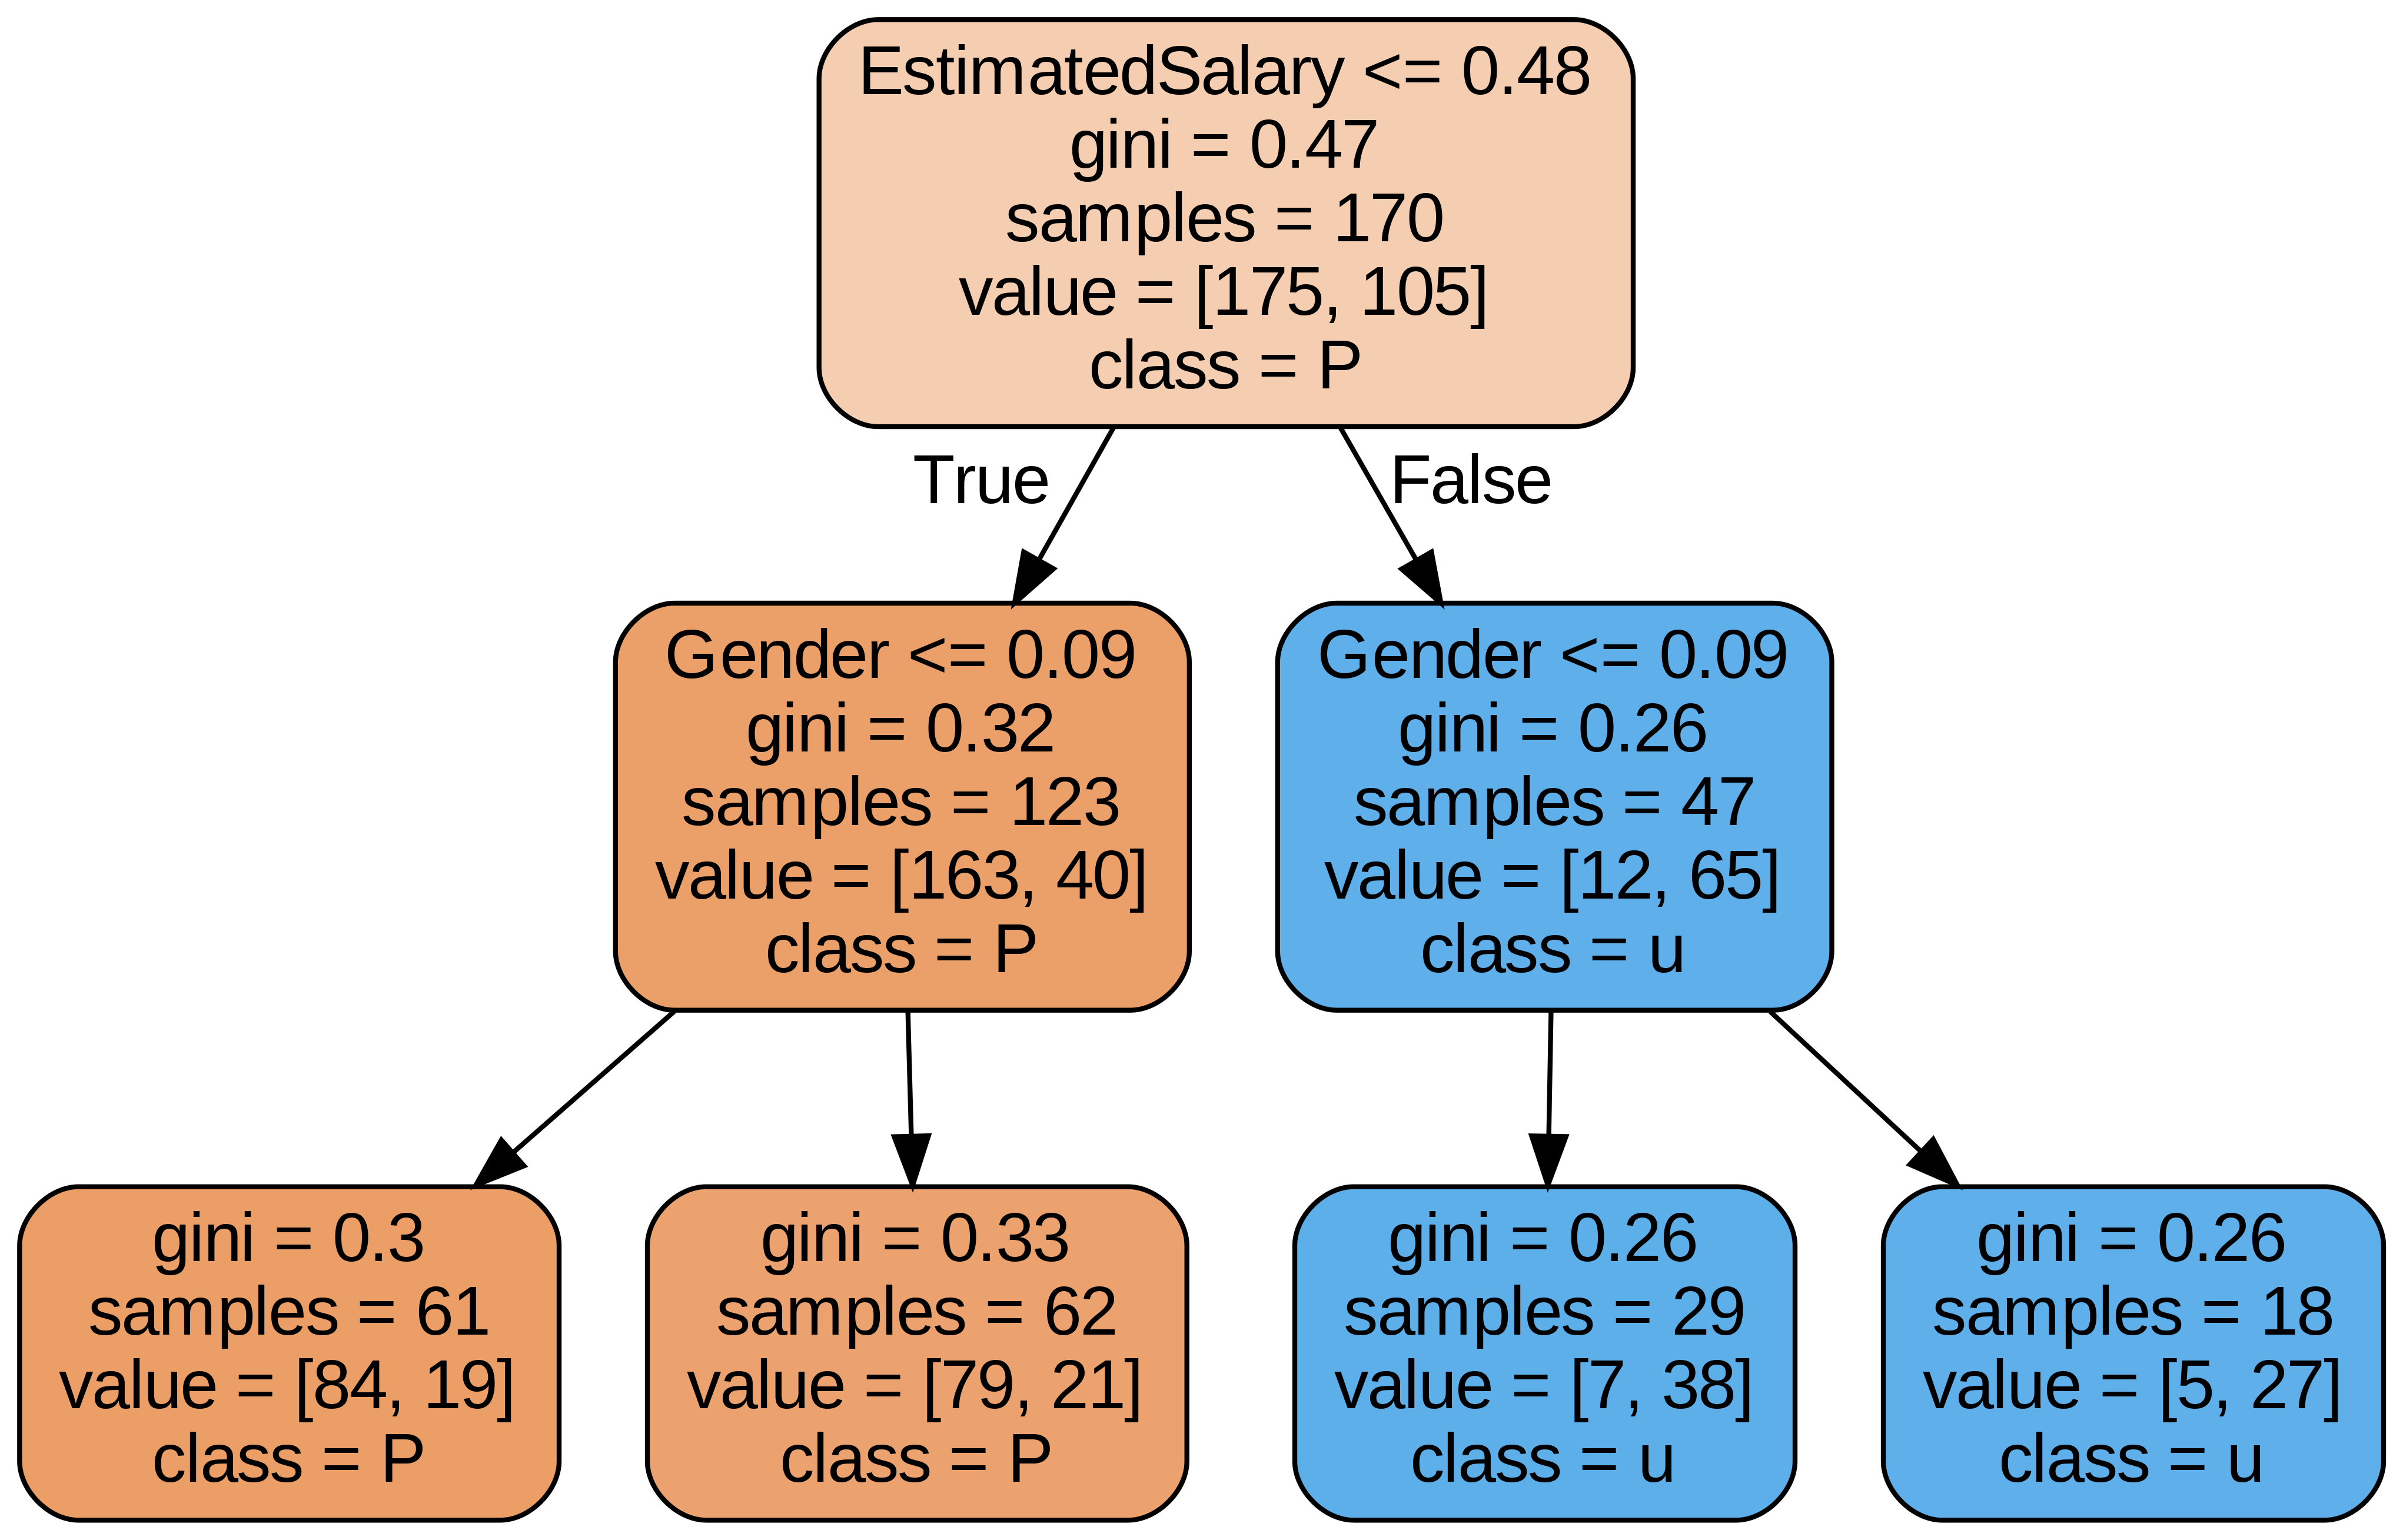

In [30]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Feature Importance 

In [31]:
importances = list(Rf.feature_importances_)
importances

[0.012604087635924218, 0.40239593181715416, 0.5849999805469217]

In [32]:
feature_list=["Gender","Age","EstimatedSalary"]

In [33]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances

[('Gender', 0.01), ('Age', 0.4), ('EstimatedSalary', 0.58)]